In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


In [186]:
df=pd.read_csv(r"C:\Users\CVR\Desktop\22B81A1292\27-03-25\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [188]:
# Step 1: Handle missing values (Convert 'TotalCharges' to numeric and fill missing)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())



In [190]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'customerID' and 'Churn' if they exist
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

# Apply Label Encoding
label_encoders = {}  
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Encode 'Churn' separately if it exists
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
print(df.head())



   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [192]:
# Step 3: Standardize numerical features
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [194]:
# Display dataset shape after preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [196]:
from sklearn.metrics import confusion_matrix
# Retry XGBoost with fewer estimators for faster execution
xgb = XGBClassifier(n_estimators=50, eval_metric='logloss', random_state=42)

xgb.fit(X_train, y_train)

# Recalculate predictions and evaluation metrics for XGBoost
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)
# Display updated accuracy and ROC-AUC score
xgb_acc


0.7984386089425124

In [198]:
bagging = BaggingClassifier(n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
bagging_cm = confusion_matrix(y_test, bagging_pred)
bagging_acc


0.7906316536550745

In [200]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
ada_cm = confusion_matrix(y_test, ada_pred)
ada_acc

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8055358410220014

In [202]:
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)
gb_acc

0.8055358410220014

In [204]:
print("Model Accuracy")
print(f"XGBoost Accuracy: {xgb_acc}")
print(f"Bagging Accuracy: {bagging_acc}")
print(f"AdaBoost Accuracy: {ada_acc}")
print(f"Gradient Boosting Accuracy: {gb_acc}")

Model Accuracy
XGBoost Accuracy: 0.7984386089425124
Bagging Accuracy: 0.7906316536550745
AdaBoost Accuracy: 0.8055358410220014
Gradient Boosting Accuracy: 0.8055358410220014


In [206]:
print("\nConfusion Matrices:")
print(f"XGBoost:\n{xgb_cm}")
print(f"Bagging:\n{bagging_cm}")
print(f"AdaBoost:\n{ada_cm}")
print(f"Gradient Boosting:\n{gb_cm}")


Confusion Matrices:
XGBoost:
[[928 108]
 [176 197]]
Bagging:
[[937  99]
 [196 177]]
AdaBoost:
[[928 108]
 [166 207]]
Gradient Boosting:
[[949  87]
 [187 186]]


In [208]:
import pandas as pd

# Create a DataFrame to display accuracy scores for all models
results_df = pd.DataFrame({
    "Model": ["Bagging", "AdaBoost", "Gradient Boosting", "XGBoost"],
    "Accuracy": [bagging_acc, ada_acc, gb_acc, xgb_acc]
})

# Display the results
results_df


,Model,Accuracy
0,Bagging,0.790632
1,AdaBoost,0.805536
2,Gradient Boosting,0.805536
3,XGBoost,0.798439


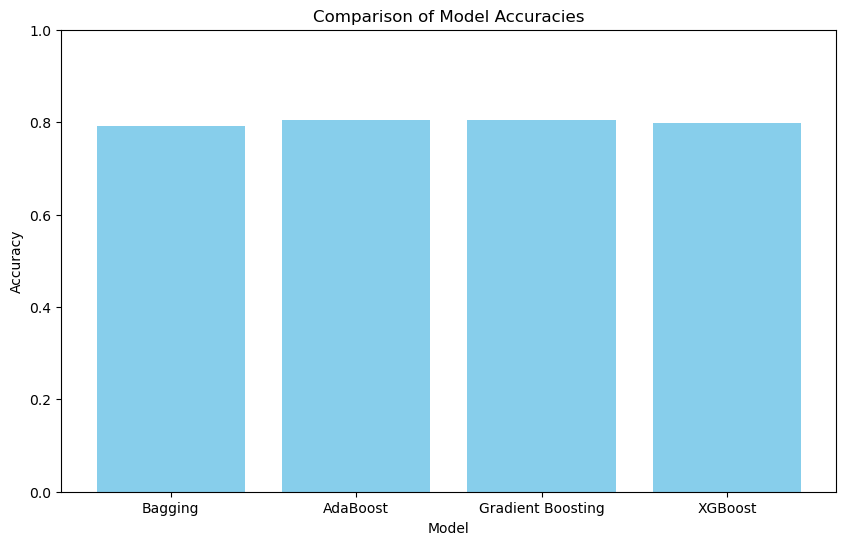

In [210]:
import matplotlib.pyplot as plt

# Plot the comparison of model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
